In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
url='https://raw.githubusercontent.com/Shubham-1105/Analytics_Vidhya_Hackathon/master/train.csv'
df=pd.read_csv(url)
url1='https://raw.githubusercontent.com/Shubham-1105/Analytics_Vidhya_Hackathon/master/test.csv'
df1=pd.read_csv(url1)


In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [329]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [330]:
df.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [331]:
df.shape


(131662, 14)

In [332]:
df.columns


Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')

In [333]:
df.index

RangeIndex(start=0, stop=131662, step=1)

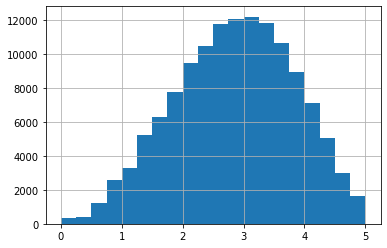

In [334]:
#df.sort_values(coulmn Name)
df['Customer_Rating'].hist(bins=20)
plt.show()



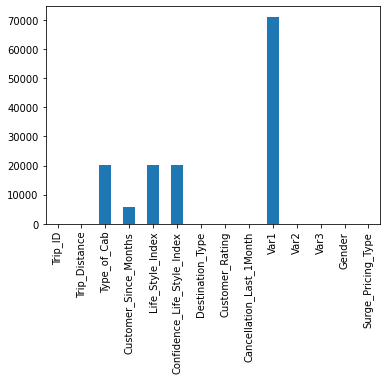

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [335]:
df.isna().sum().plot(kind="bar")
plt.show()
#Solution to missing values
#df.dropna()
#df.fillna()
df.info()



In [0]:
#Splitting into feature dependent and independent
x=df.drop(['Trip_ID','Surge_Pricing_Type'],axis=1)


In [337]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
x[['Type_of_Cab','Confidence_Life_Style_Index']]=imputer.fit_transform(x[['Type_of_Cab','Confidence_Life_Style_Index']])
x.isna().sum()

Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index        0
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
dtype: int64

Dealing with Missing Values
None and np.nan
np.isnan(np.nan)
import missingno as msno

In [338]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
x[['Customer_Since_Months','Life_Style_Index','Var1']]=imputer.fit_transform(x[['Customer_Since_Months','Life_Style_Index','Var1']])
x.isna().sum()



Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
dtype: int64

In [0]:
#Encoding the caftegorical variables
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
x['Type_of_Cab']=labelencoder.fit_transform(x['Type_of_Cab'])
x['Confidence_Life_Style_Index']=labelencoder.fit_transform(x['Confidence_Life_Style_Index'])
x['Destination_Type']=labelencoder.fit_transform(x['Destination_Type'])
x['Gender']=labelencoder.fit_transform(x['Gender'])


In [0]:
#Normalizing the numerical data between 0 and 1
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#numerical_data=['Trip_Distance','Customer_Since_Months','Life_Style_Index','Customer_Rating','Cancellation_Last_1Month','Var1','Var2','Var3']
#x[numerical_data]=scaler.fit_transform(x[numerical_data])


In [0]:
y=df["Surge_Pricing_Type"]



In [0]:
df_trip_id=df1['Trip_ID']
df1=df1.drop('Trip_ID',axis=1)

In [343]:
df1.isna().sum()

Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [344]:
#Handling missing and encoding categorical variables for test data
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df1[['Type_of_Cab','Confidence_Life_Style_Index']]=imputer.fit_transform(df1[['Type_of_Cab','Confidence_Life_Style_Index']])

imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
df1[['Customer_Since_Months','Life_Style_Index','Var1']]=imputer.fit_transform(df1[['Customer_Since_Months','Life_Style_Index','Var1']])

df1.isna().sum()

#Encoding the caftegorical variables
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df1['Type_of_Cab']=labelencoder.fit_transform(df1['Type_of_Cab'])
df1['Confidence_Life_Style_Index']=labelencoder.fit_transform(df1['Confidence_Life_Style_Index'])
df1['Destination_Type']=labelencoder.fit_transform(df1['Destination_Type'])
df1['Gender']=labelencoder.fit_transform(df1['Gender'])
df1


,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,9.44,0,10.0,2.574380,0,1,3.68000,2,63.93661,46,63,1
1,32.15,1,10.0,2.851430,0,0,1.59375,0,65.00000,49,80,0
2,10.38,2,4.0,2.705300,0,3,4.50500,0,63.93661,47,74,1
3,14.94,1,6.0,2.481590,2,4,4.53000,0,63.00000,43,54,1
4,32.03,1,7.0,2.815980,0,10,4.60125,3,96.00000,44,56,1
...,...,...,...,...,...,...,...,...,...,...,...,...
87390,29.43,2,3.0,2.407200,2,0,0.99750,0,74.00000,48,72,0
87391,14.83,2,10.0,2.570090,0,3,4.74375,0,109.00000,42,60,0
87392,37.86,0,6.0,3.082270,2,0,1.63500,0,63.93661,57,77,1
87393,10.63,2,1.0,2.803392,1,9,2.59875,1,107.00000,51,77,1


In [372]:
from xgboost import XGBClassifier
dtc=XGBClassifier()
dtc.fit(x,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred=dtc.predict(df1)
t=pd.Series(y_pred)


In [374]:
sam=pd.concat([df_trip_id,t],axis=1,ignore_index=True)
sam

,0,1
0,T0005689459,1
1,T0005689462,2
2,T0005689463,2
3,T0005689466,2
4,T0005689468,2
...,...,...
87390,T0005908503,2
87391,T0005908504,2
87392,T0005908505,1
87393,T0005908511,2


In [0]:
sam.to_csv('analytics.csv',header=['Trip_ID','Surge_Pricing_Type'],index=False)